## Test Scoring Pipeline

### Introduction

Now that the data has been prepared into wide format, and the machine learning model building and deployment are complete, this current notebook will:

* Install dependencies that provide a unified explaination of the output of the machine learning models **(SHAP)** 
* Provide the step-by-step test and deployment of the **CUSTOMER CHURN PREDICTION** scoring pipeline as a **Web Service**.
* Provide the step-by-step instructions for securing changes into git and elaborates the **Project Release** steps.


**Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2019. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp. <br>**

### Install Shap

This is a prerequisite for the machine learning Models explainability. This considers all type of input combinations to analyze all possible predictions and visualize the results. 

There are two options for installing shap.

1. The casual user can uncomment the lines in the following cell and run the cell. This will install shap in the image but will not save the image for future use.

2. If you would prefer to save the image, to avoid having to install shap each time, follow the instructions in the subsequent cell.

In [1]:
# Uncomment the below lines to install additional libraries. This will take a few minutes to execute.
# !conda install --yes shap
# !pip install --upgrade matplotlib
#!pip install notebook==5.7.0

#### To install shap and save image for repeated use:

Click on the highlighted button to access the terminal. If the environment is stopped click on the play button to get it running again. Execute the above commands to install / upgrade the packages. 

<p>
    <img src="../misc/images/env1.PNG" alt="Environment" style="height: 300px;" align="left" />
    <br style="clear: both;" />
</p>

Once the installations are complete, exit the terminal and click on the save button to save the custom image.

Next, select the custom image for your environment 
* Click on the juptyer environment
* Select the custom image from the dropdown list
* Save and Restart

<p>
    <img src="../misc/images/image_.PNG" alt="Image" style="height: 300px;" align="left" />
    <br style="clear: both;" />
</p>

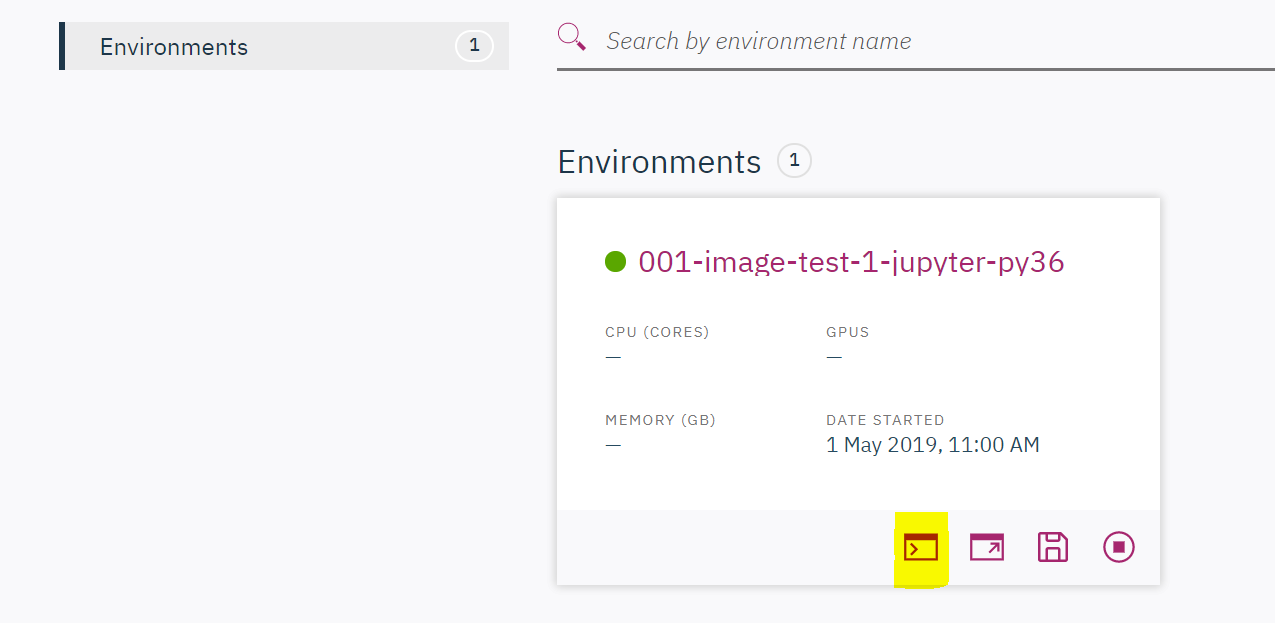

In [22]:
from IPython.display import Image
Image(filename='../misc/images/env1.PNG') 

In [2]:
import shap
shap.__version__

'0.28.5'

Before running the code, Go to the Environments tab and check if the respective environment is running. Click on the PLAY button to start the environment 

### Build Input JSON Payload

This code snippet is used eventually to test the webservice against a particular Customer. It passes the following fields ***Customer ID, Customer history dataset and Scoring end date*** to load Churn data for selected Customers. 

In [3]:
import json

cust_id = 1218

payload = {"args": { "dataset_name": "customer_history.csv", "cust_id": cust_id, "sc_end_date": "2018-09-30" }}
print(json.dumps(payload, indent=2))

{
  "args": {
    "dataset_name": "customer_history.csv",
    "cust_id": 1218,
    "sc_end_date": "2018-09-30"
  }
}


### To Test the Scoring Pipeline -- Churn_Scoring_Pipeline.py script as a WEBSERVICE 

Go to the Assets tab. Choose the script Churn_Scoring_Pipeline.py from the list of scripts

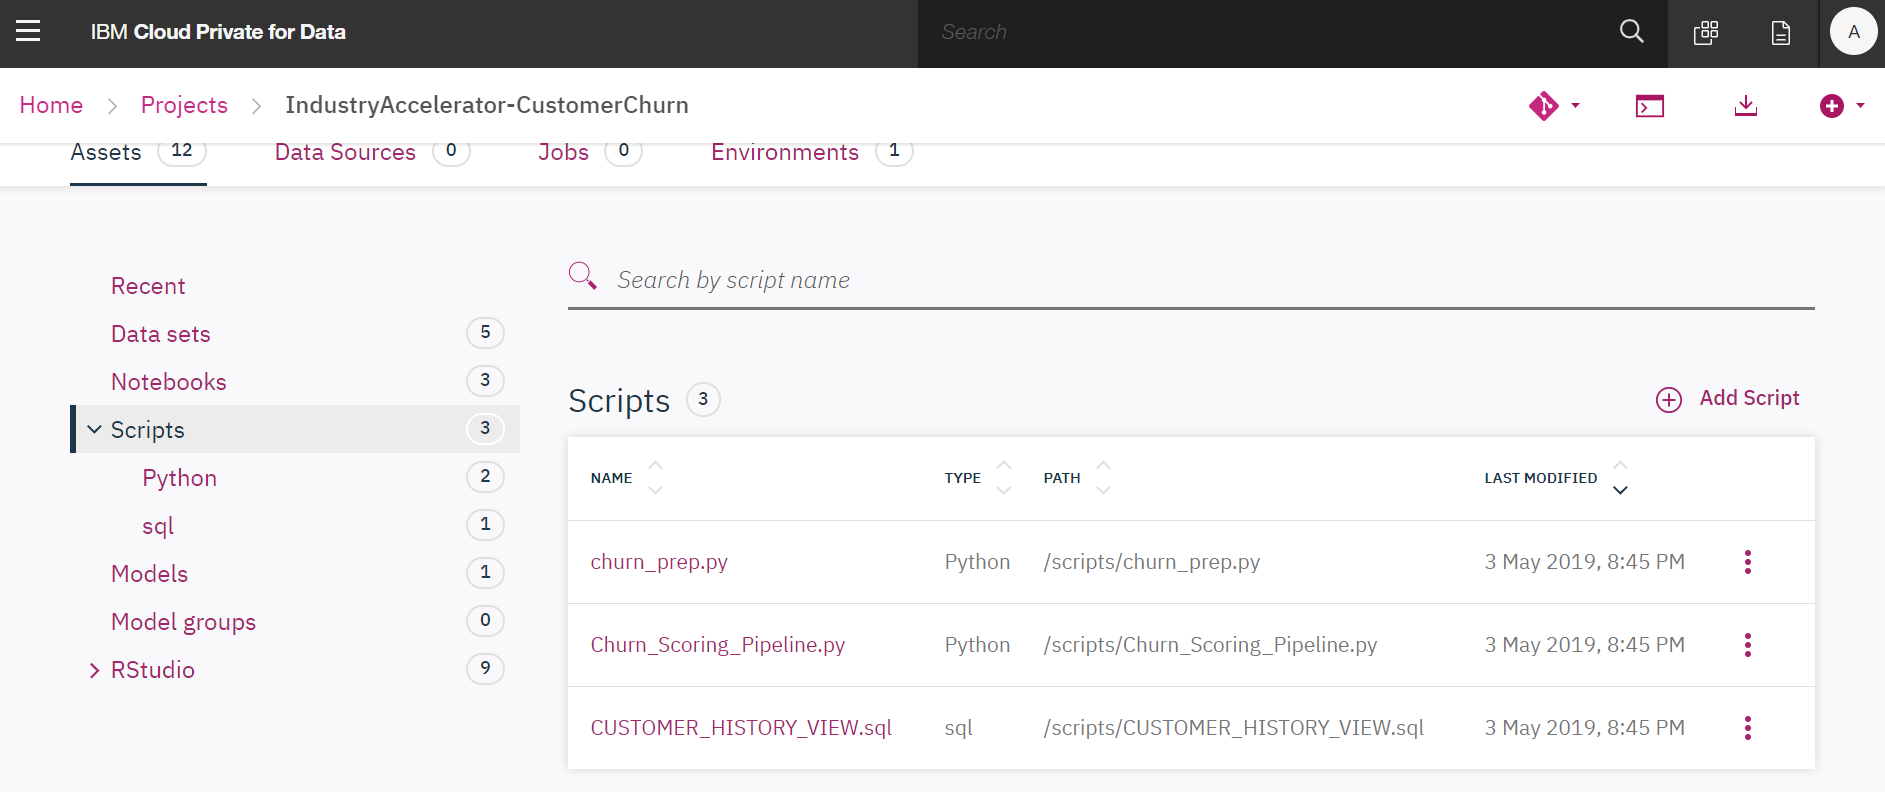

In [5]:
from IPython.display import Image
Image(filename='../misc/images/choose_ScriptFile.PNG') 

In the right side of the open script select the Run Configuration icon & set the **script Category as Web Service** and Run the file.  The associated worker is shown here as well.

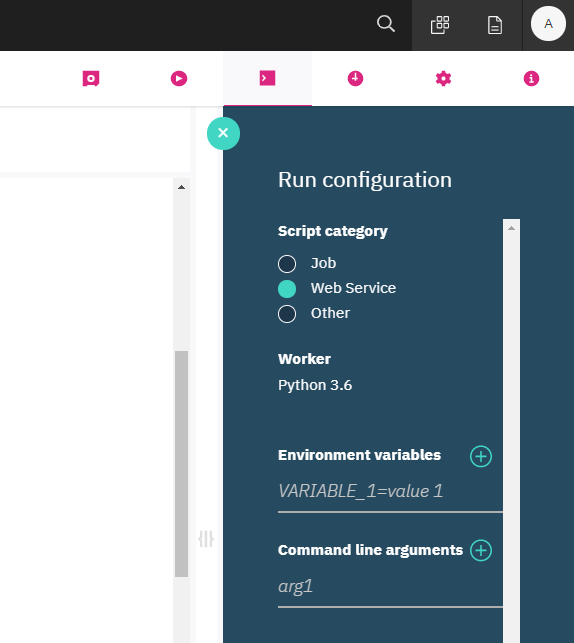

In [6]:
from IPython.display import Image
Image(filename='../misc/images/web_service.PNG') 

Once this is done you are prompted with the following fields along with the commands to run the web service script. 


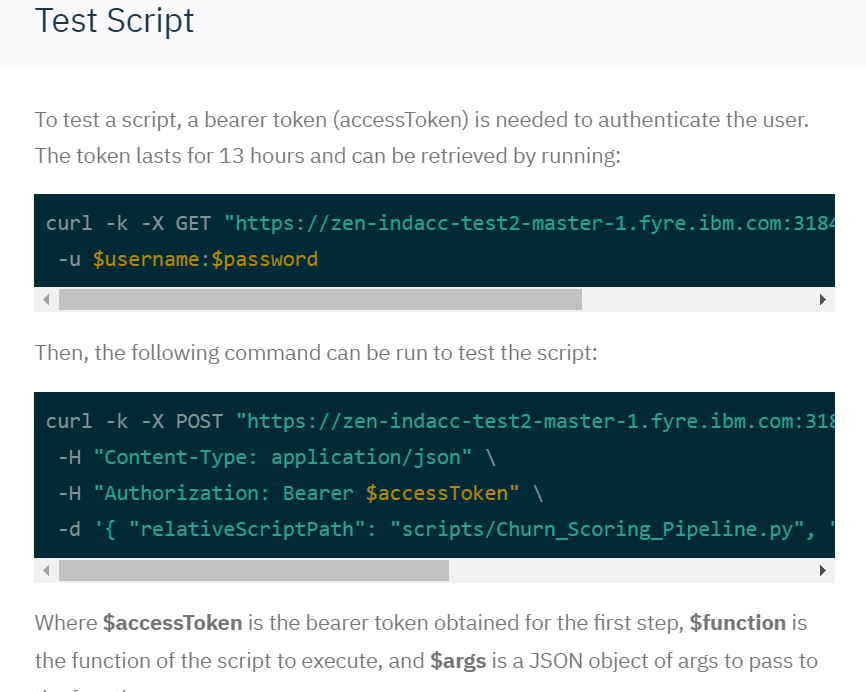

In [7]:
from IPython.display import Image
Image(filename='../misc/images/WS_prompt.PNG') 

### Test Scoring Pipeline REST API Endpoint

The test script generates a POST URL, copy the URL (up to the $function) and substitute it in the below ***test_endpoint*** and run the script to generate the json. You can find the test_endpoint in the cell below labelled with. 

 **'https://post_endpoint_url_of_webservice_deployed/test_score'**


The test will pass all the fields from the payload along with the path for the Scoring pipeline, the flag that mentions test/score, the test token (for authorization) and checks the response. 

Finally the result here would comprise of the prediction related information and other analytical information necessary to feature in the R Shiny dashboard. 

In [4]:
import os, requests

test_endpoint ='<TEST_SCRIPT_URL>/test_score'
test_token = os.environ['DSX_TOKEN']

test_payload = payload.copy()
test_payload["relativeScriptPath"] = "scripts/Churn_Scoring_Pipeline.py"

headers = {'Content-Type': 'application/json', 'Authorization': test_token}
response_scoring = requests.post(test_endpoint, json=test_payload, headers=headers, verify=False)

try:
    response_dict = response_scoring.json()
    print(json.dumps(response_dict, indent=2))
except:
    print(response_scoring.text)

/opt/conda/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{
  "result": {
    "classes": [
      0,
      1
    ],
    "probabilities": [
      [
        0.8782821198421084,
        0.12171788015789171
      ]
    ],
    "predictions": [
      0
    ],
    "explain": {
      "CUSTOMER_EMPLOYMENT_STATUS_Retired": -0.039740760783112436,
      "NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH": -0.033304085931754365,
      "CUSTOMER_MARITAL_STATUS_Single": -0.013092516119900251,
      "CUSTOMER_SUMMARY_ASSETS": 0.0602881859978975,
      "NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH": 0.06208830779180483,
      "CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS": 0.0763782863673823
    },
    "explain_plot_html": "<div id='i8XSQ6HJSEZ8F7A5Y67GO'>\n<div style='color: #900; text-align: center;'>\n  <b>Visualization omitted, Javascript library not loaded!</b><br>\n  Have you run `initjs()` in this notebook? If this notebook was from another\n  user you must also trust this notebook (File -> Trust notebook). If you are viewing\n  this notebook on github

## Release and Deploy Model Scoring REST API Endpoint

Now that we've confirmed that the model scoring REST API is working, we are ready to release the project and deploy the script to production.

### Commit Changes
First, you must commit your changes. To do this, click the **Git Actions** dropdown and select **Commit**

### Tag and Push

> After you've committed, push the changes on to the repository from the same menu displayed above. 

> In the dialog box that appears, fill in the field to **Create version tag for release**

> And then click **Push**

## Release the Project

ICP for Data creates a project release out of the state of a project at any given point in time as denoted by a user-defined tag mentioned above. After the project release is created, assets within this project release can then be deployed.

**TO CREATE THE PROJECT RELEASE**

> From the menu, administer > manage deployments

> Go to add project release. Select the source, whether to import from the ICP for Data, Git Repository or a local file. Fill in the details. 

> The name can contain hyphens but not special characters such as a period (.).

> The route is the unique ID for the project release, and is used within the deployments' REST paths and URLs. It can contain at least 2 and at most 26 lowercase alphanumeric characters and hyphens, and must start with a letter and end with a letter or number.

> It would require a Git token in case the Project is being exported from a Git Repository, also the associated **version tag for release**.



**After completing the release, Go to the Project Release details page and click on the Launch(play) button.** 

> In the Assets tab, select the Churn_Scoring_Pipeline.py script from the left side of the assets tab.  On the right side, click the button to create a web service. The Create web service deployment window opens. This will allow the deployment of the script as a webservice permanently for production purposes rather than a test.

> Select the image created earlier for the environment.

> Once the field are specified and webservice is deployed, the endpoint for the same is displayed. The Webservice must be enabled. Go to  **Project Release > Assets > Under Churn_Scoring_Pipeline availability options > Click enable**. 

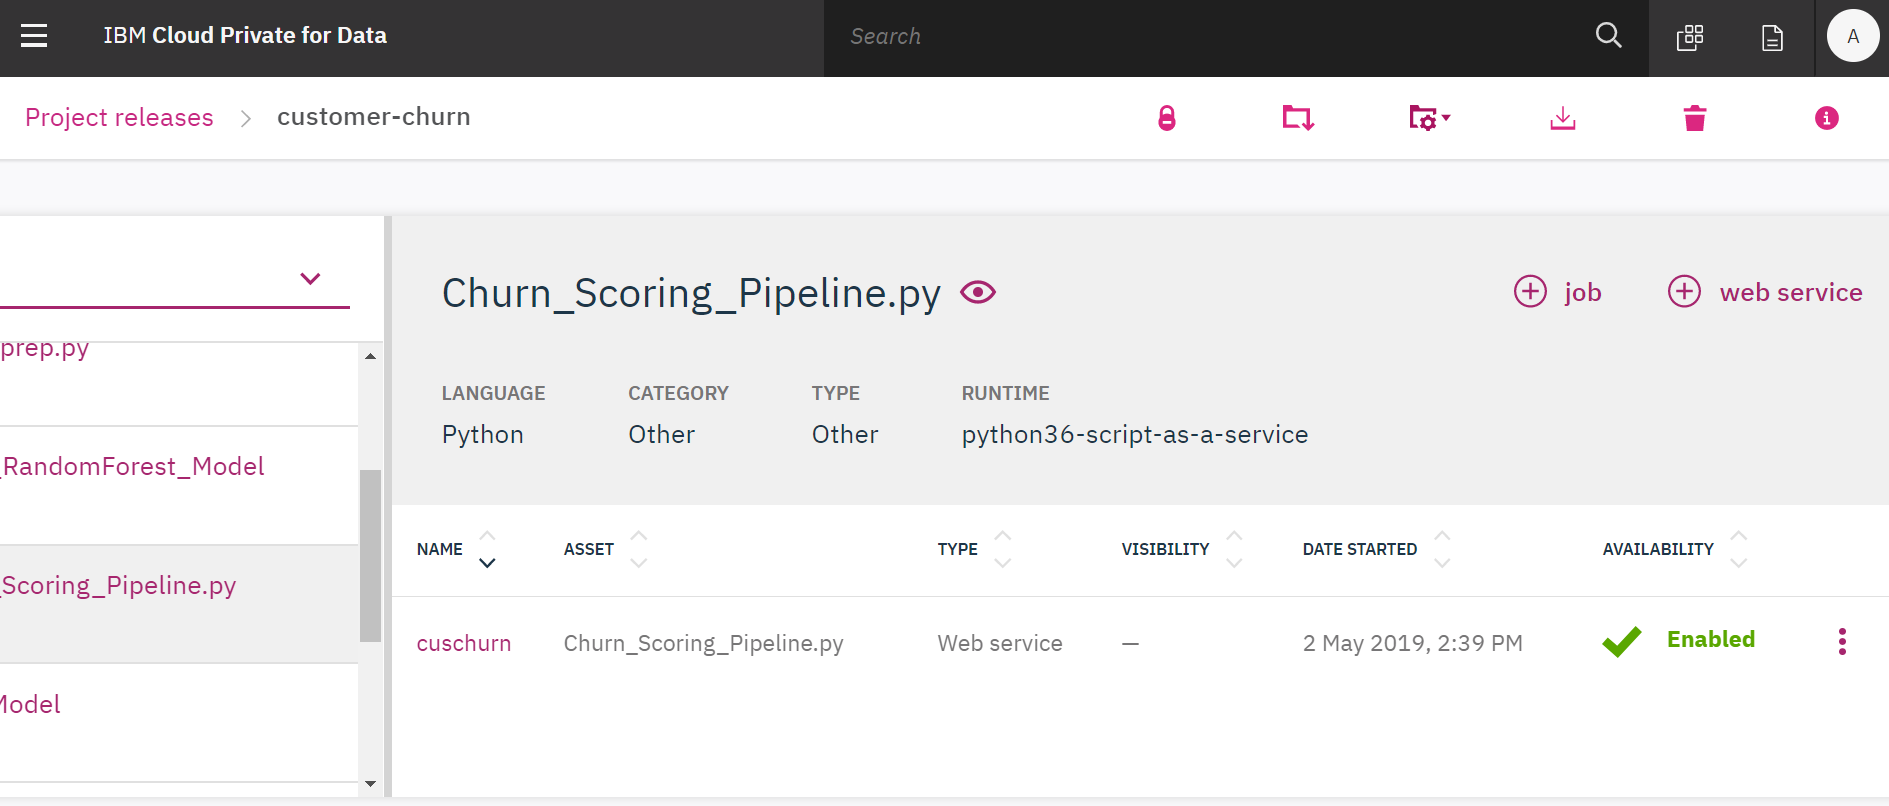

In [9]:
from IPython.display import Image
Image(filename='../misc/images/webservice_Deploy1.PNG') 

### Running the script as a Web Service using the created Endpoint and Deployment Token

From Deployments tab, click on the web service. Copy the Endpoint and the deployment token from the deployed webservice and paste into the cell below replacing the DEPLOYMENT_ENDPOINT and DEPLOYMENT_TK values.

**'https://endpoint_post_url_of_deployed_webservice_script/score'**

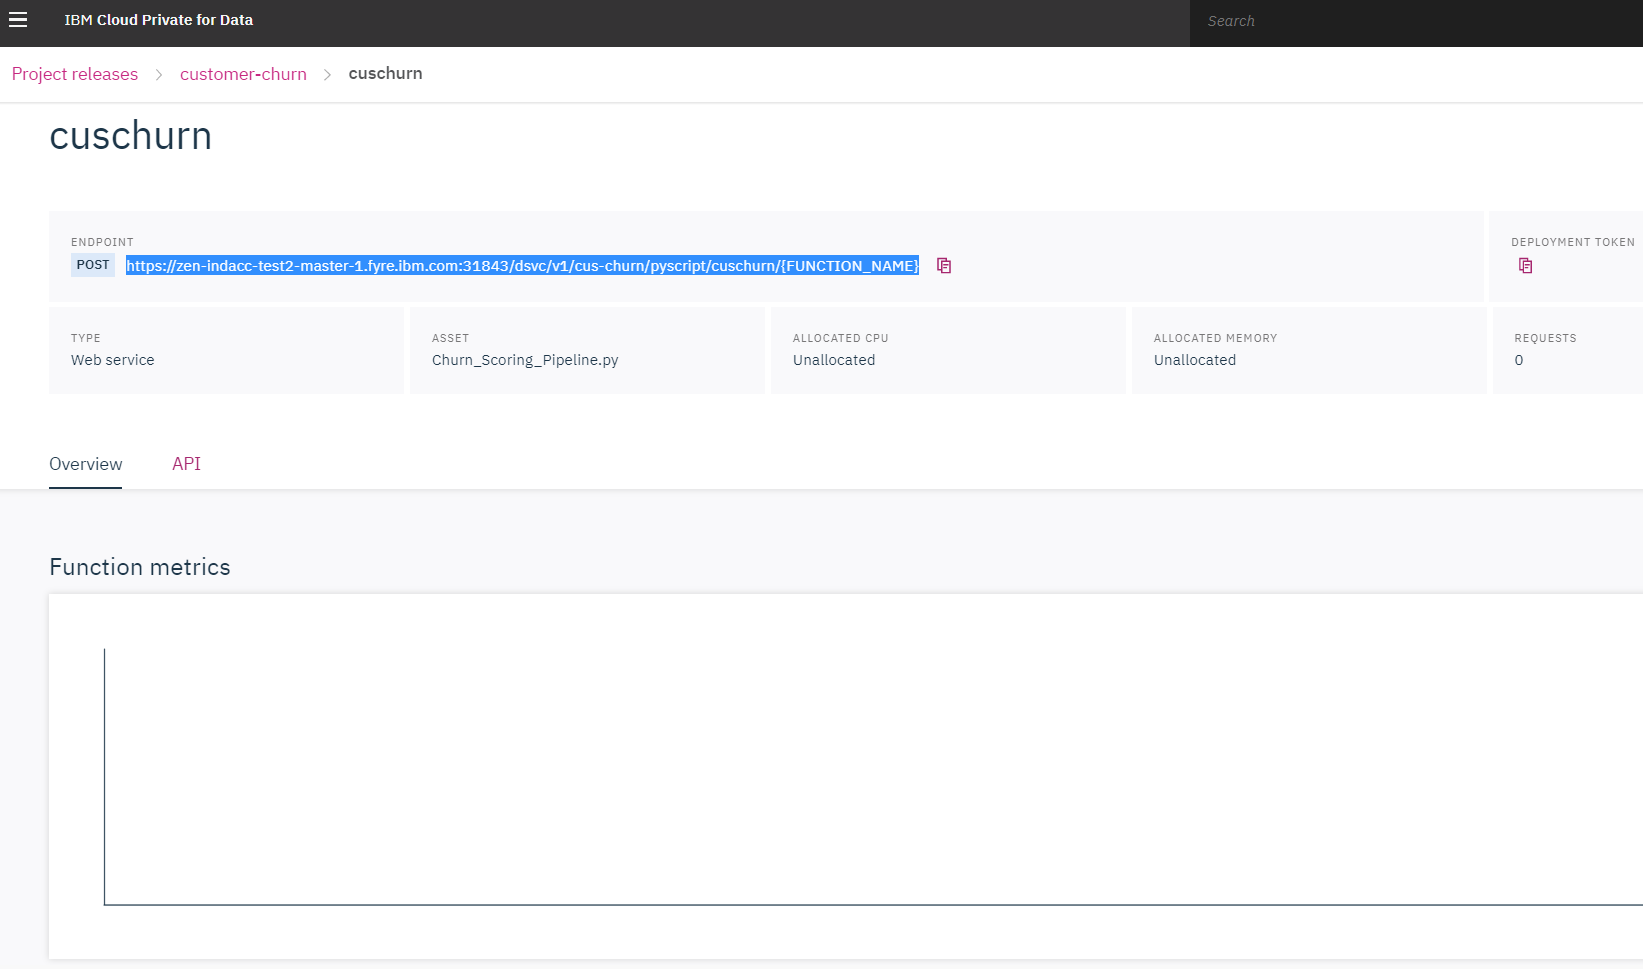

In [10]:
from IPython.display import Image
Image(filename='../misc/images/endpoint.PNG') 

In [5]:
import os, requests

deployment_endpoint = '<DEPLOYMENT_ENDPOINT>'
deployment_tk = '<DEPLOYMENT_TK>'

test_payload = payload.copy()
headers = {'Content-Type': 'application/json', 'Authorization': deployment_tk}

response_scoring = requests.post(deployment_endpoint, json=test_payload, headers=headers, verify=False)

try:
    response_dict = response_scoring.json()
    print(json.dumps(response_dict, indent=2))
except:
    print(response_scoring.text)

/opt/conda/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{
  "result": {
    "classes": [
      0,
      1
    ],
    "probabilities": [
      [
        0.8782821198421084,
        0.12171788015789171
      ]
    ],
    "predictions": [
      0
    ],
    "explain": {
      "CUSTOMER_EMPLOYMENT_STATUS_Retired": -0.039740760783112436,
      "NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH": -0.033304085931754365,
      "CUSTOMER_MARITAL_STATUS_Single": -0.013092516119900251,
      "CUSTOMER_SUMMARY_ASSETS": 0.0602881859978975,
      "NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH": 0.06208830779180483,
      "CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS": 0.0763782863673823
    },
    "explain_plot_html": "<div id='iA8PLKIIY082FMRXA4G63'>\n<div style='color: #900; text-align: center;'>\n  <b>Visualization omitted, Javascript library not loaded!</b><br>\n  Have you run `initjs()` in this notebook? If this notebook was from another\n  user you must also trust this notebook (File -> Trust notebook). If you are viewing\n  this notebook on github

**Once the Webservice is confirmed to be running, proceed to the R Shiny Dashboard. <br>
The R Shiny Dashboard invokes the scoring pipeline webservice for visualizing of the results.**

## Deploy R Shiny Dashboard

> Now we are ready to set up our R Shiny Dashboard which will invoke the scoring pipeline from an application. 

>You should then see a single asset in the list. Select it and then click the **+ app** button.

> Give the dashboard a valid name, e.g. **dashboard** 

> Select the desired accessibility of the dashboard in the **Shared with** radio button menu and the click **Create**.




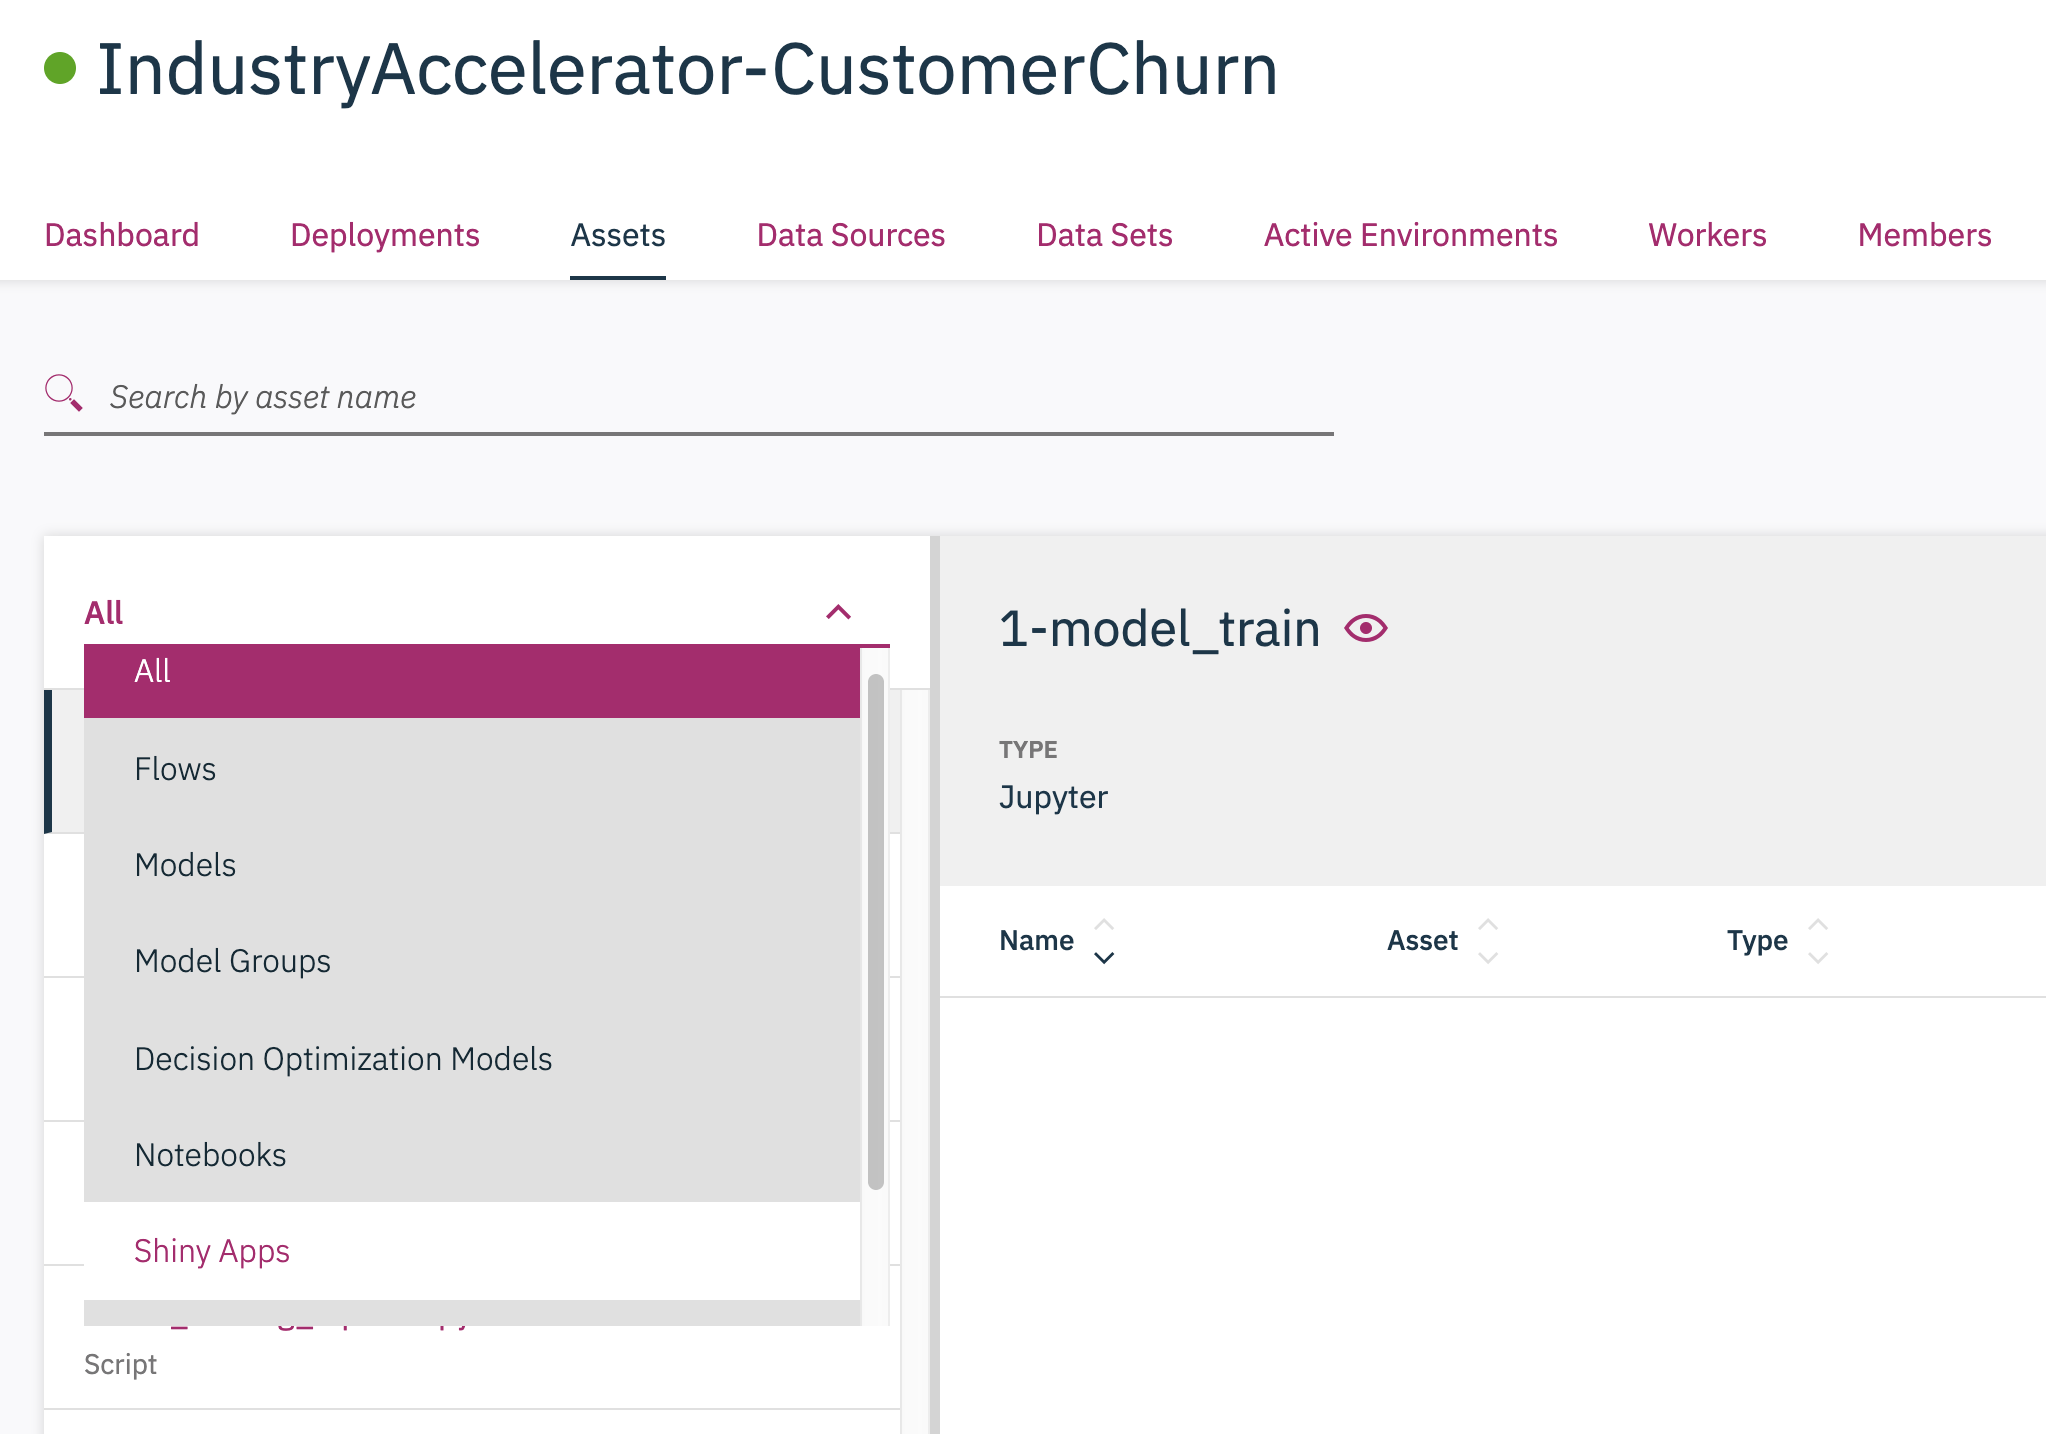

In [12]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-1-FilterAssets.png') 

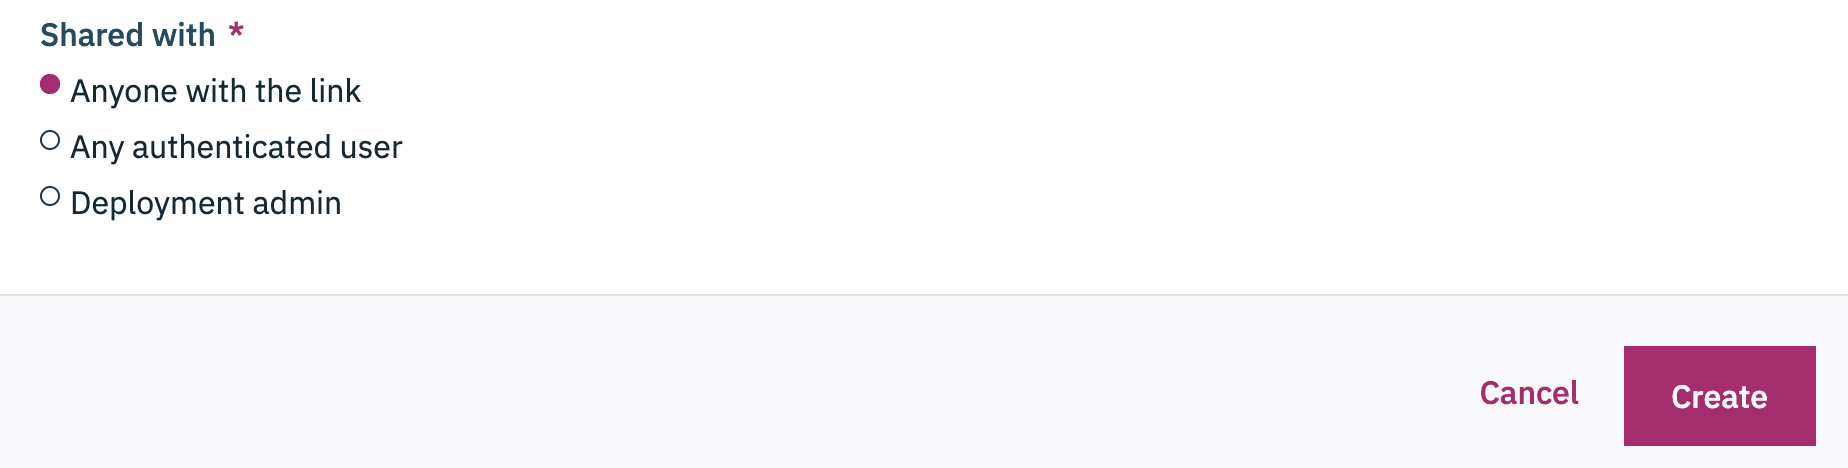

In [14]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-4-DeploymentAccess.png') 


You should then see two deployments in the list: one for the model pipeline, the other for the dashboard.

The dashboard will take a minute or two to start up. You can refresh the status by navigating to another tab and then back. Once it's ready, you'll see a green **√ Enabled** status under **Availability**

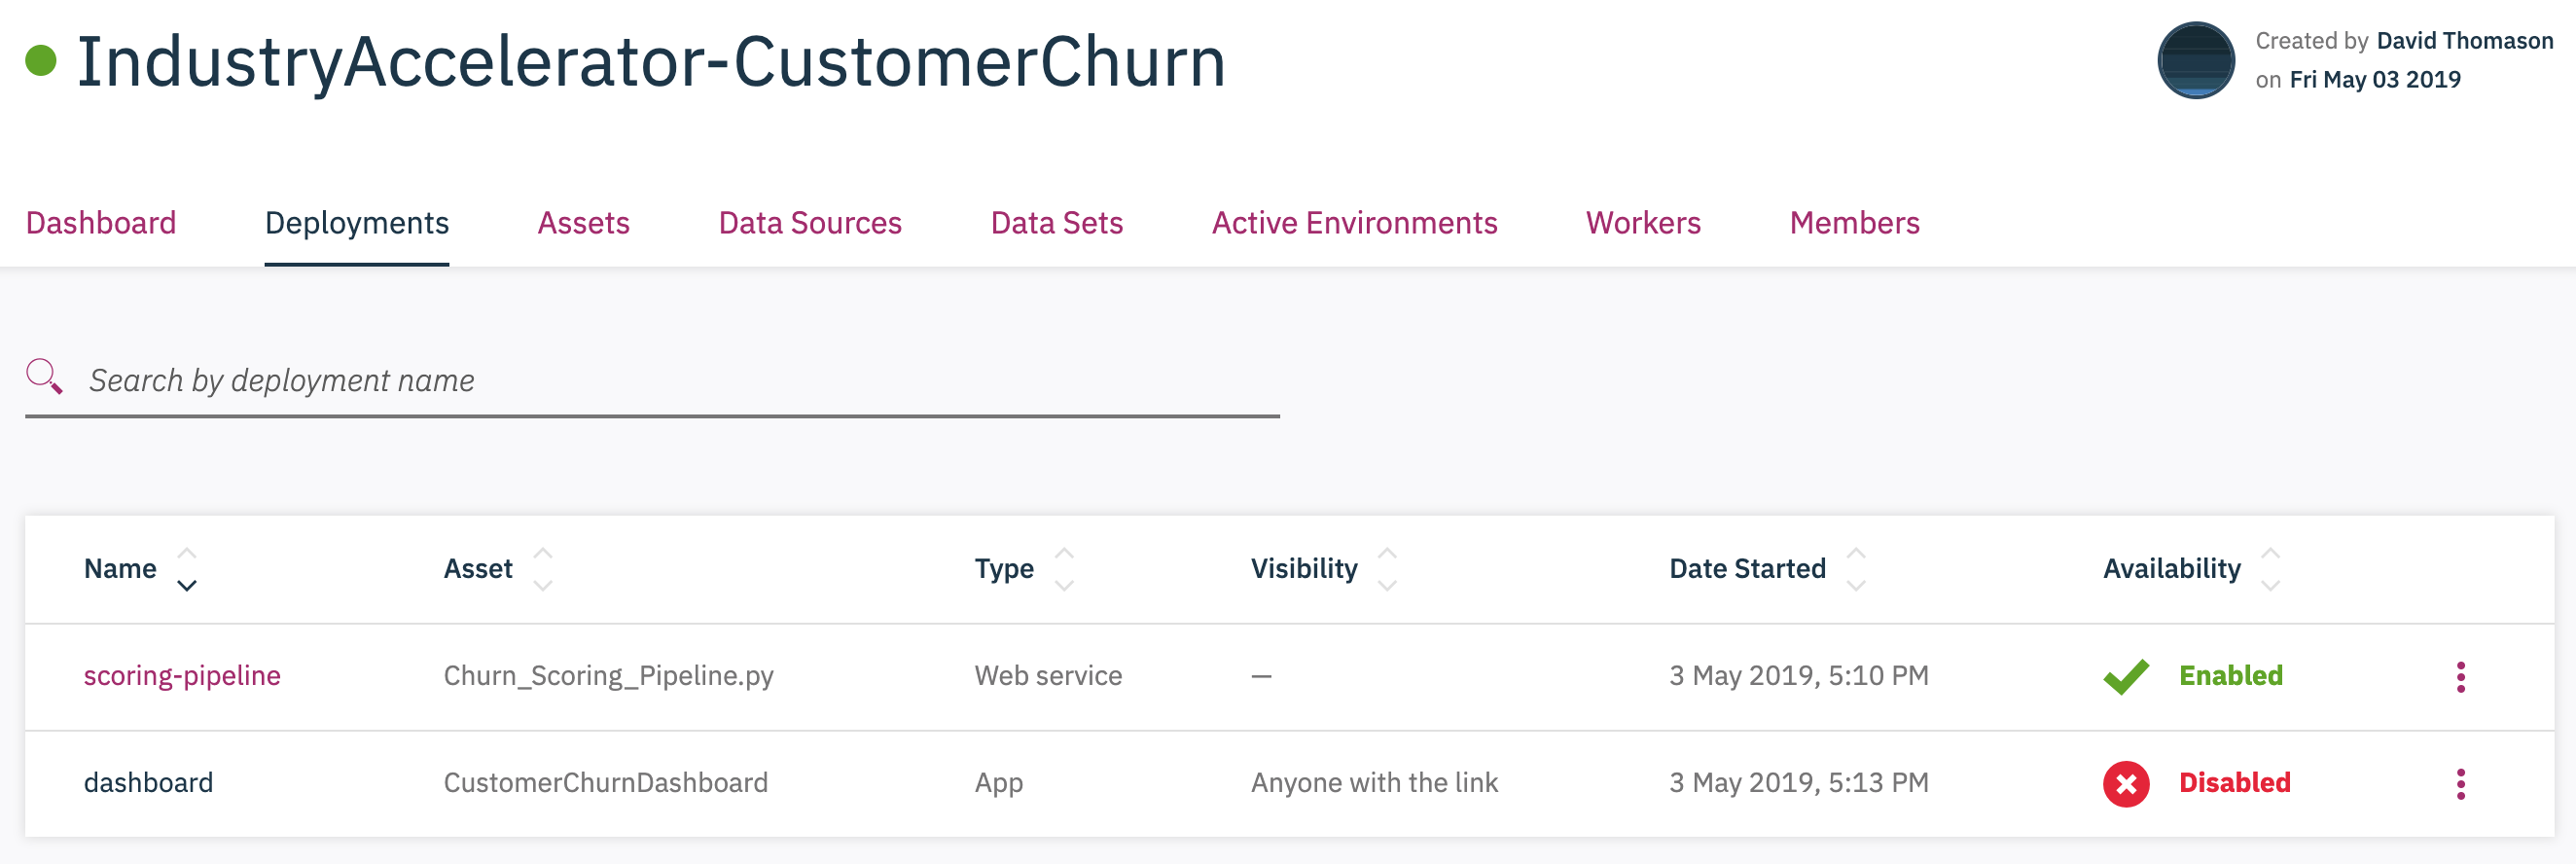

In [16]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-5-DeploymentCreated.png') 



In [ ]:
Click the menu button in the row of the dashboard deployment. Select **Share endpoint** from the menu.

A modal will pop up with the route of the dashboard. Copy it to a new tab in your browser and navigate to the link.

There may be some additional delay while the shiny server starts up. Refresh the page if it does not load the first time. You should then see the dashboard home page.



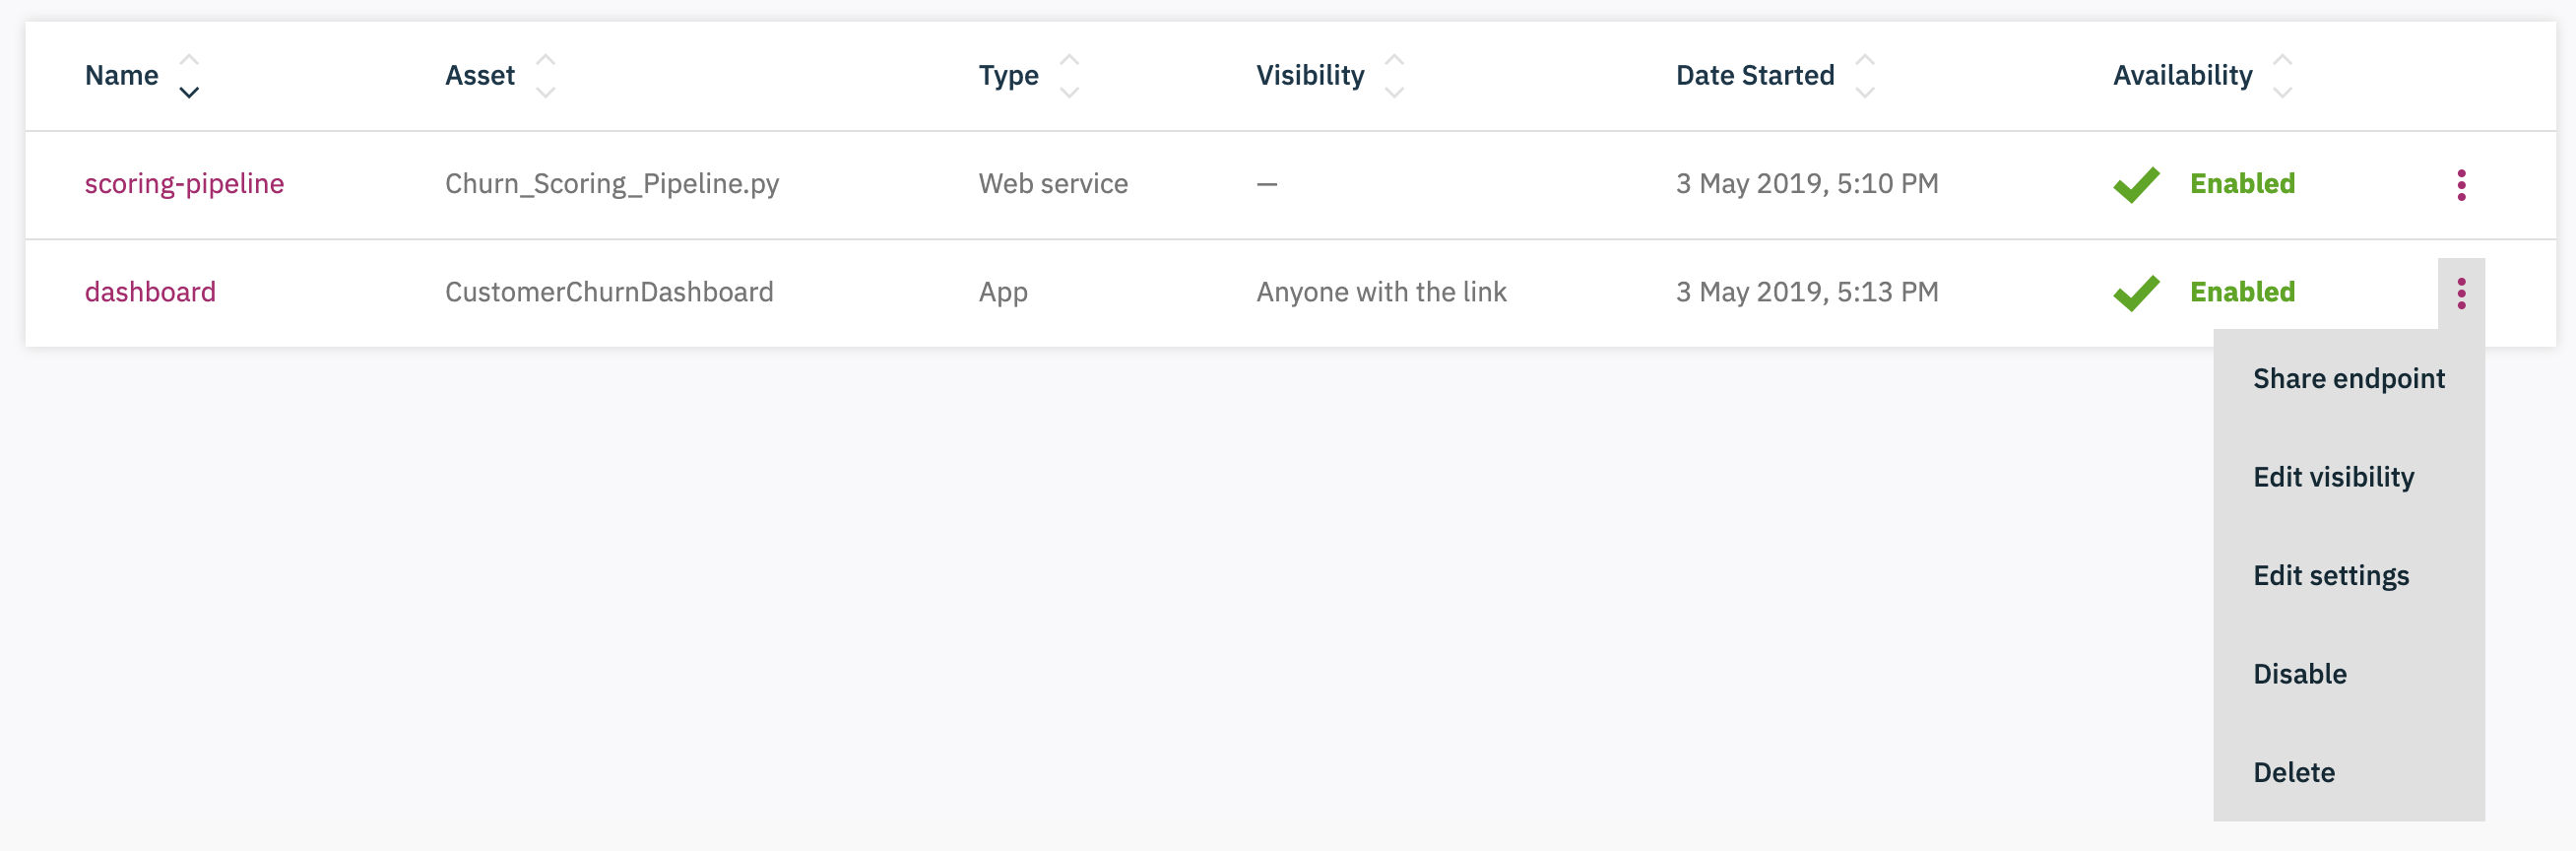

In [18]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-7-ShareEndpoint.png') 


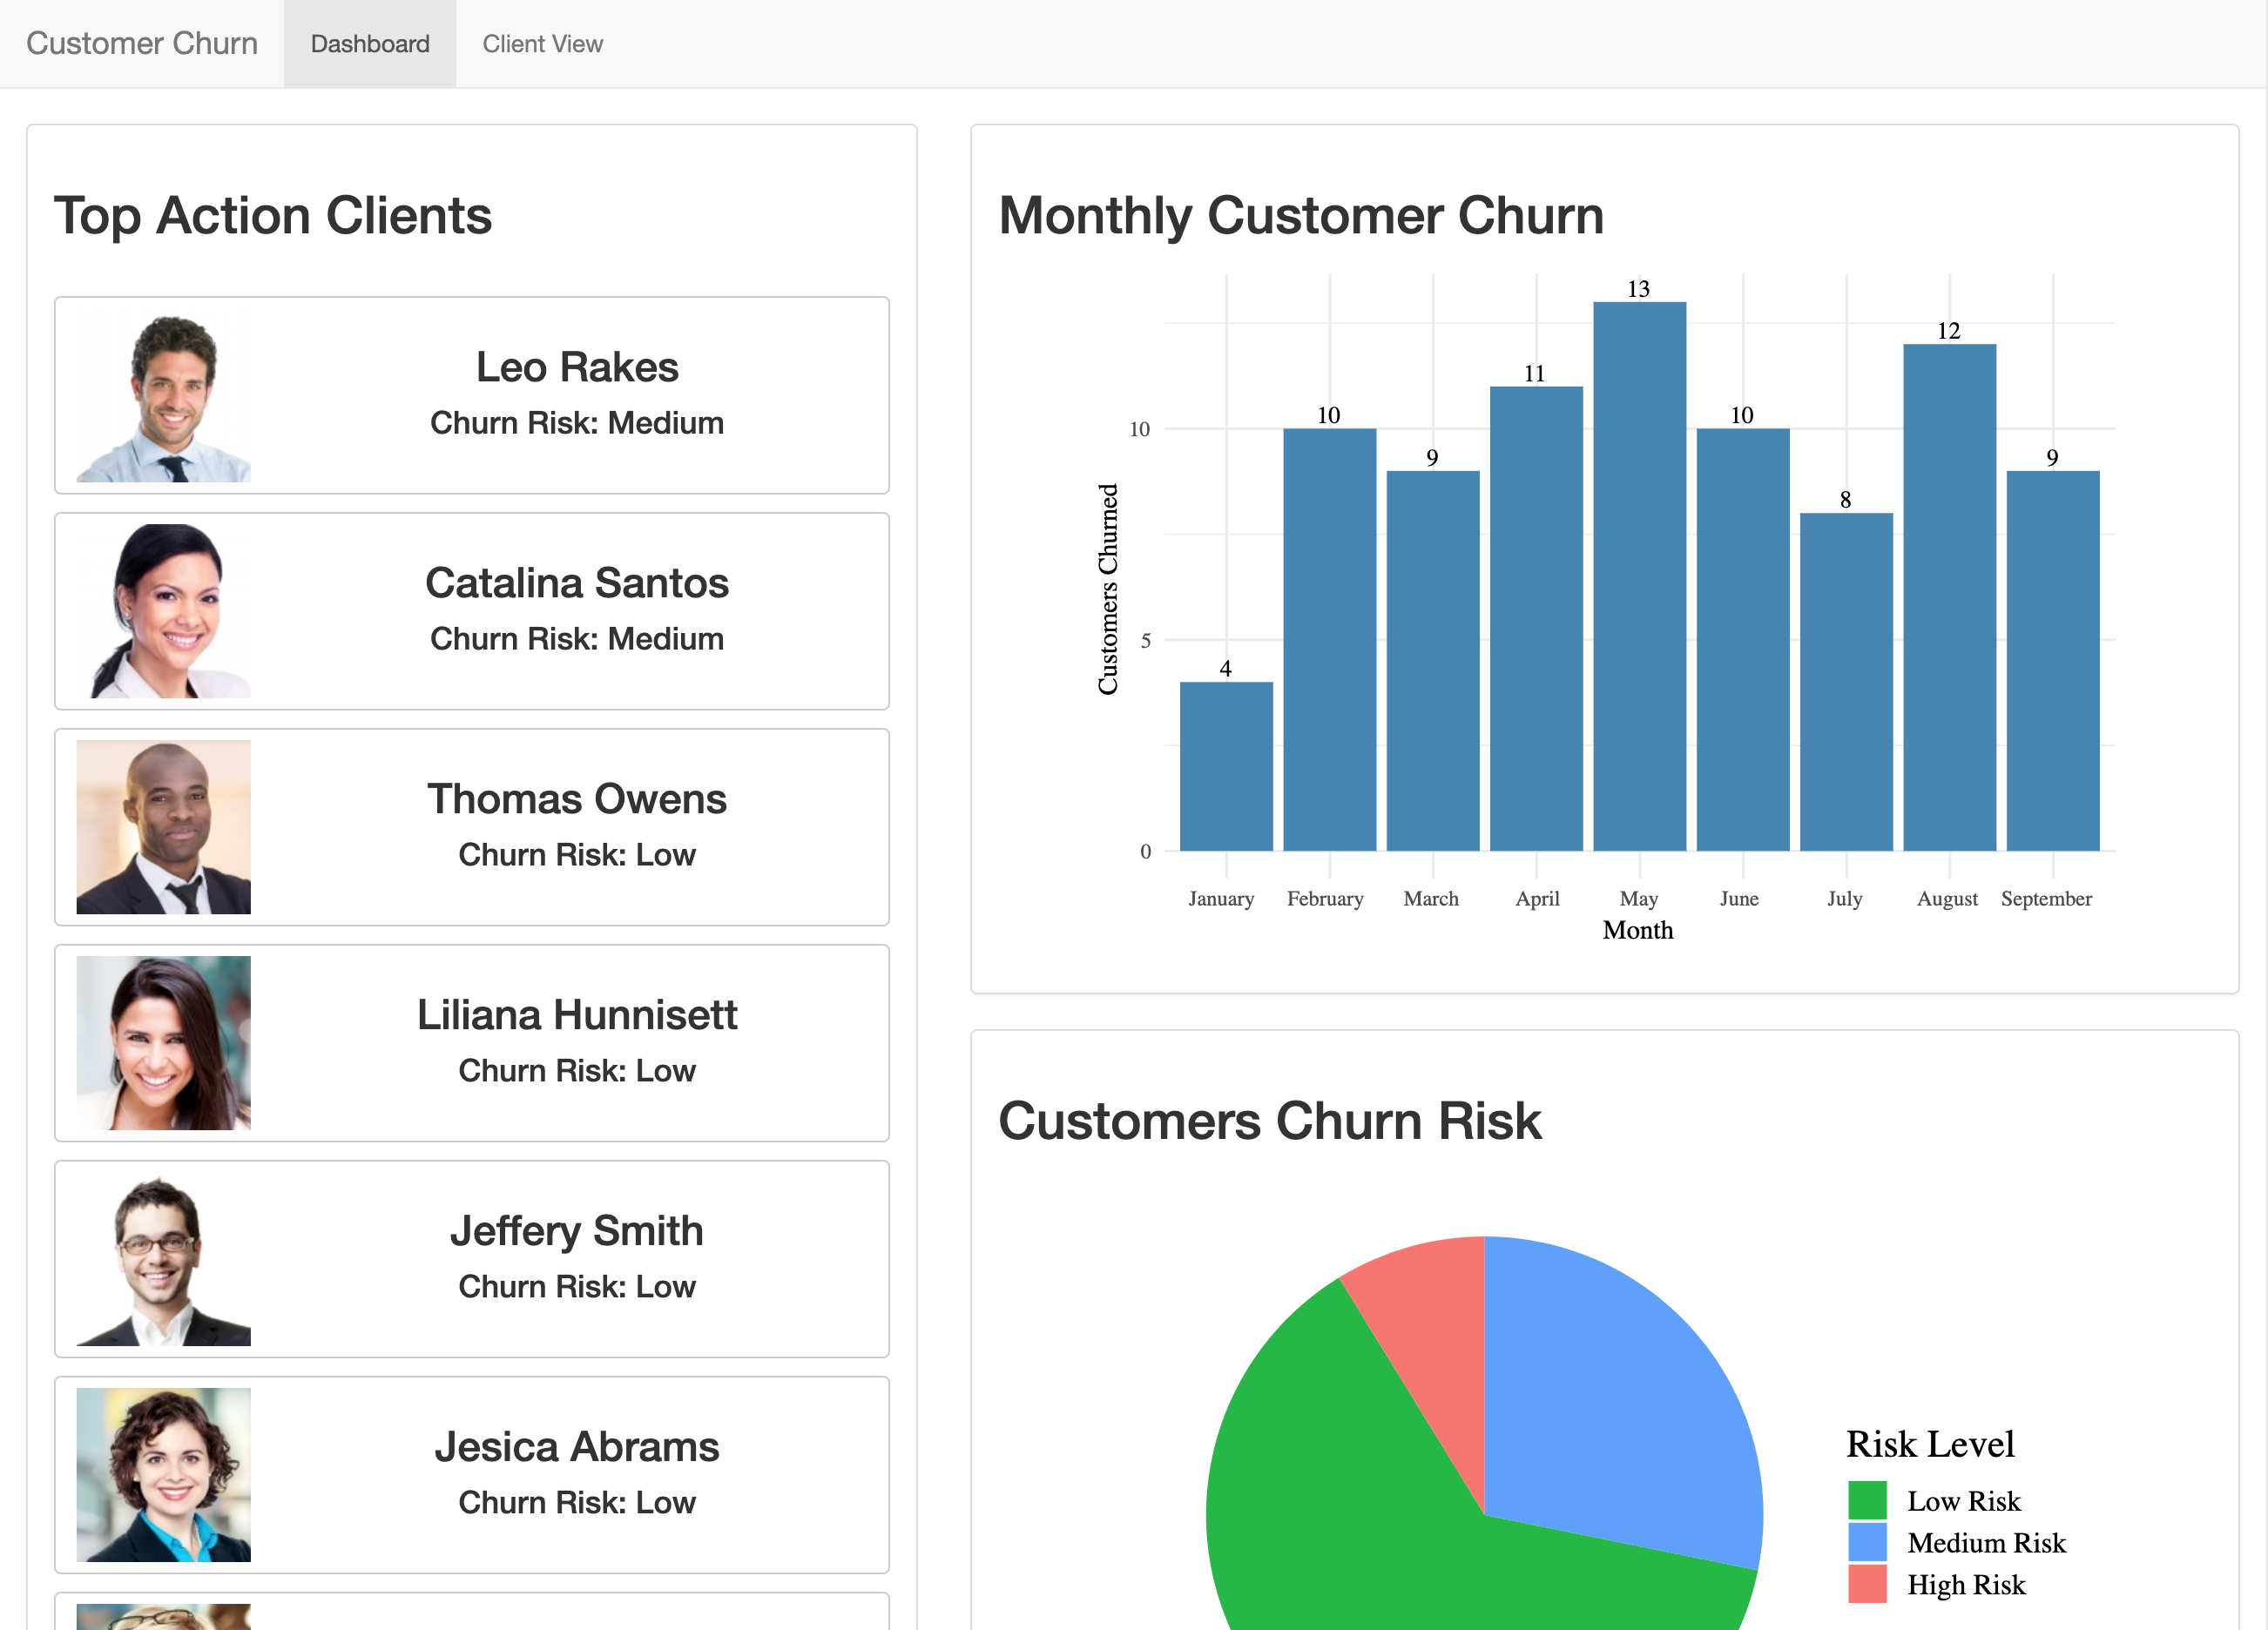

In [19]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-9-DashboardHome.png') 


In [ ]:

Click on one of the **Top Action Clients**.

This which will take you to the Client View page.

Scroll down to the **Churn Prediction** panel at the bottom of the page.

**NOTE:** You must have access to the scoring pipeline deployment before authenticating. If you did not create the scoring deployment yourself, be sure that the person who did gives you acccess to the project release so that you can see it in the deployments page (can be in any project release, even a different one from the dashboard)

Enter your ICP4D username and password. This will search through all project releases that your user has access to, searching for valid scoring pipeline deployments to use.

You should then see a model deployment selected, with details. The **Script Name** should be "Churn_Scoring_Pipeline.py". You can now click **Predict Churn**

The panel should then be populated with the churn prediction visuals and feature importance information.


Congratulations! You've predicted churn for the customer!

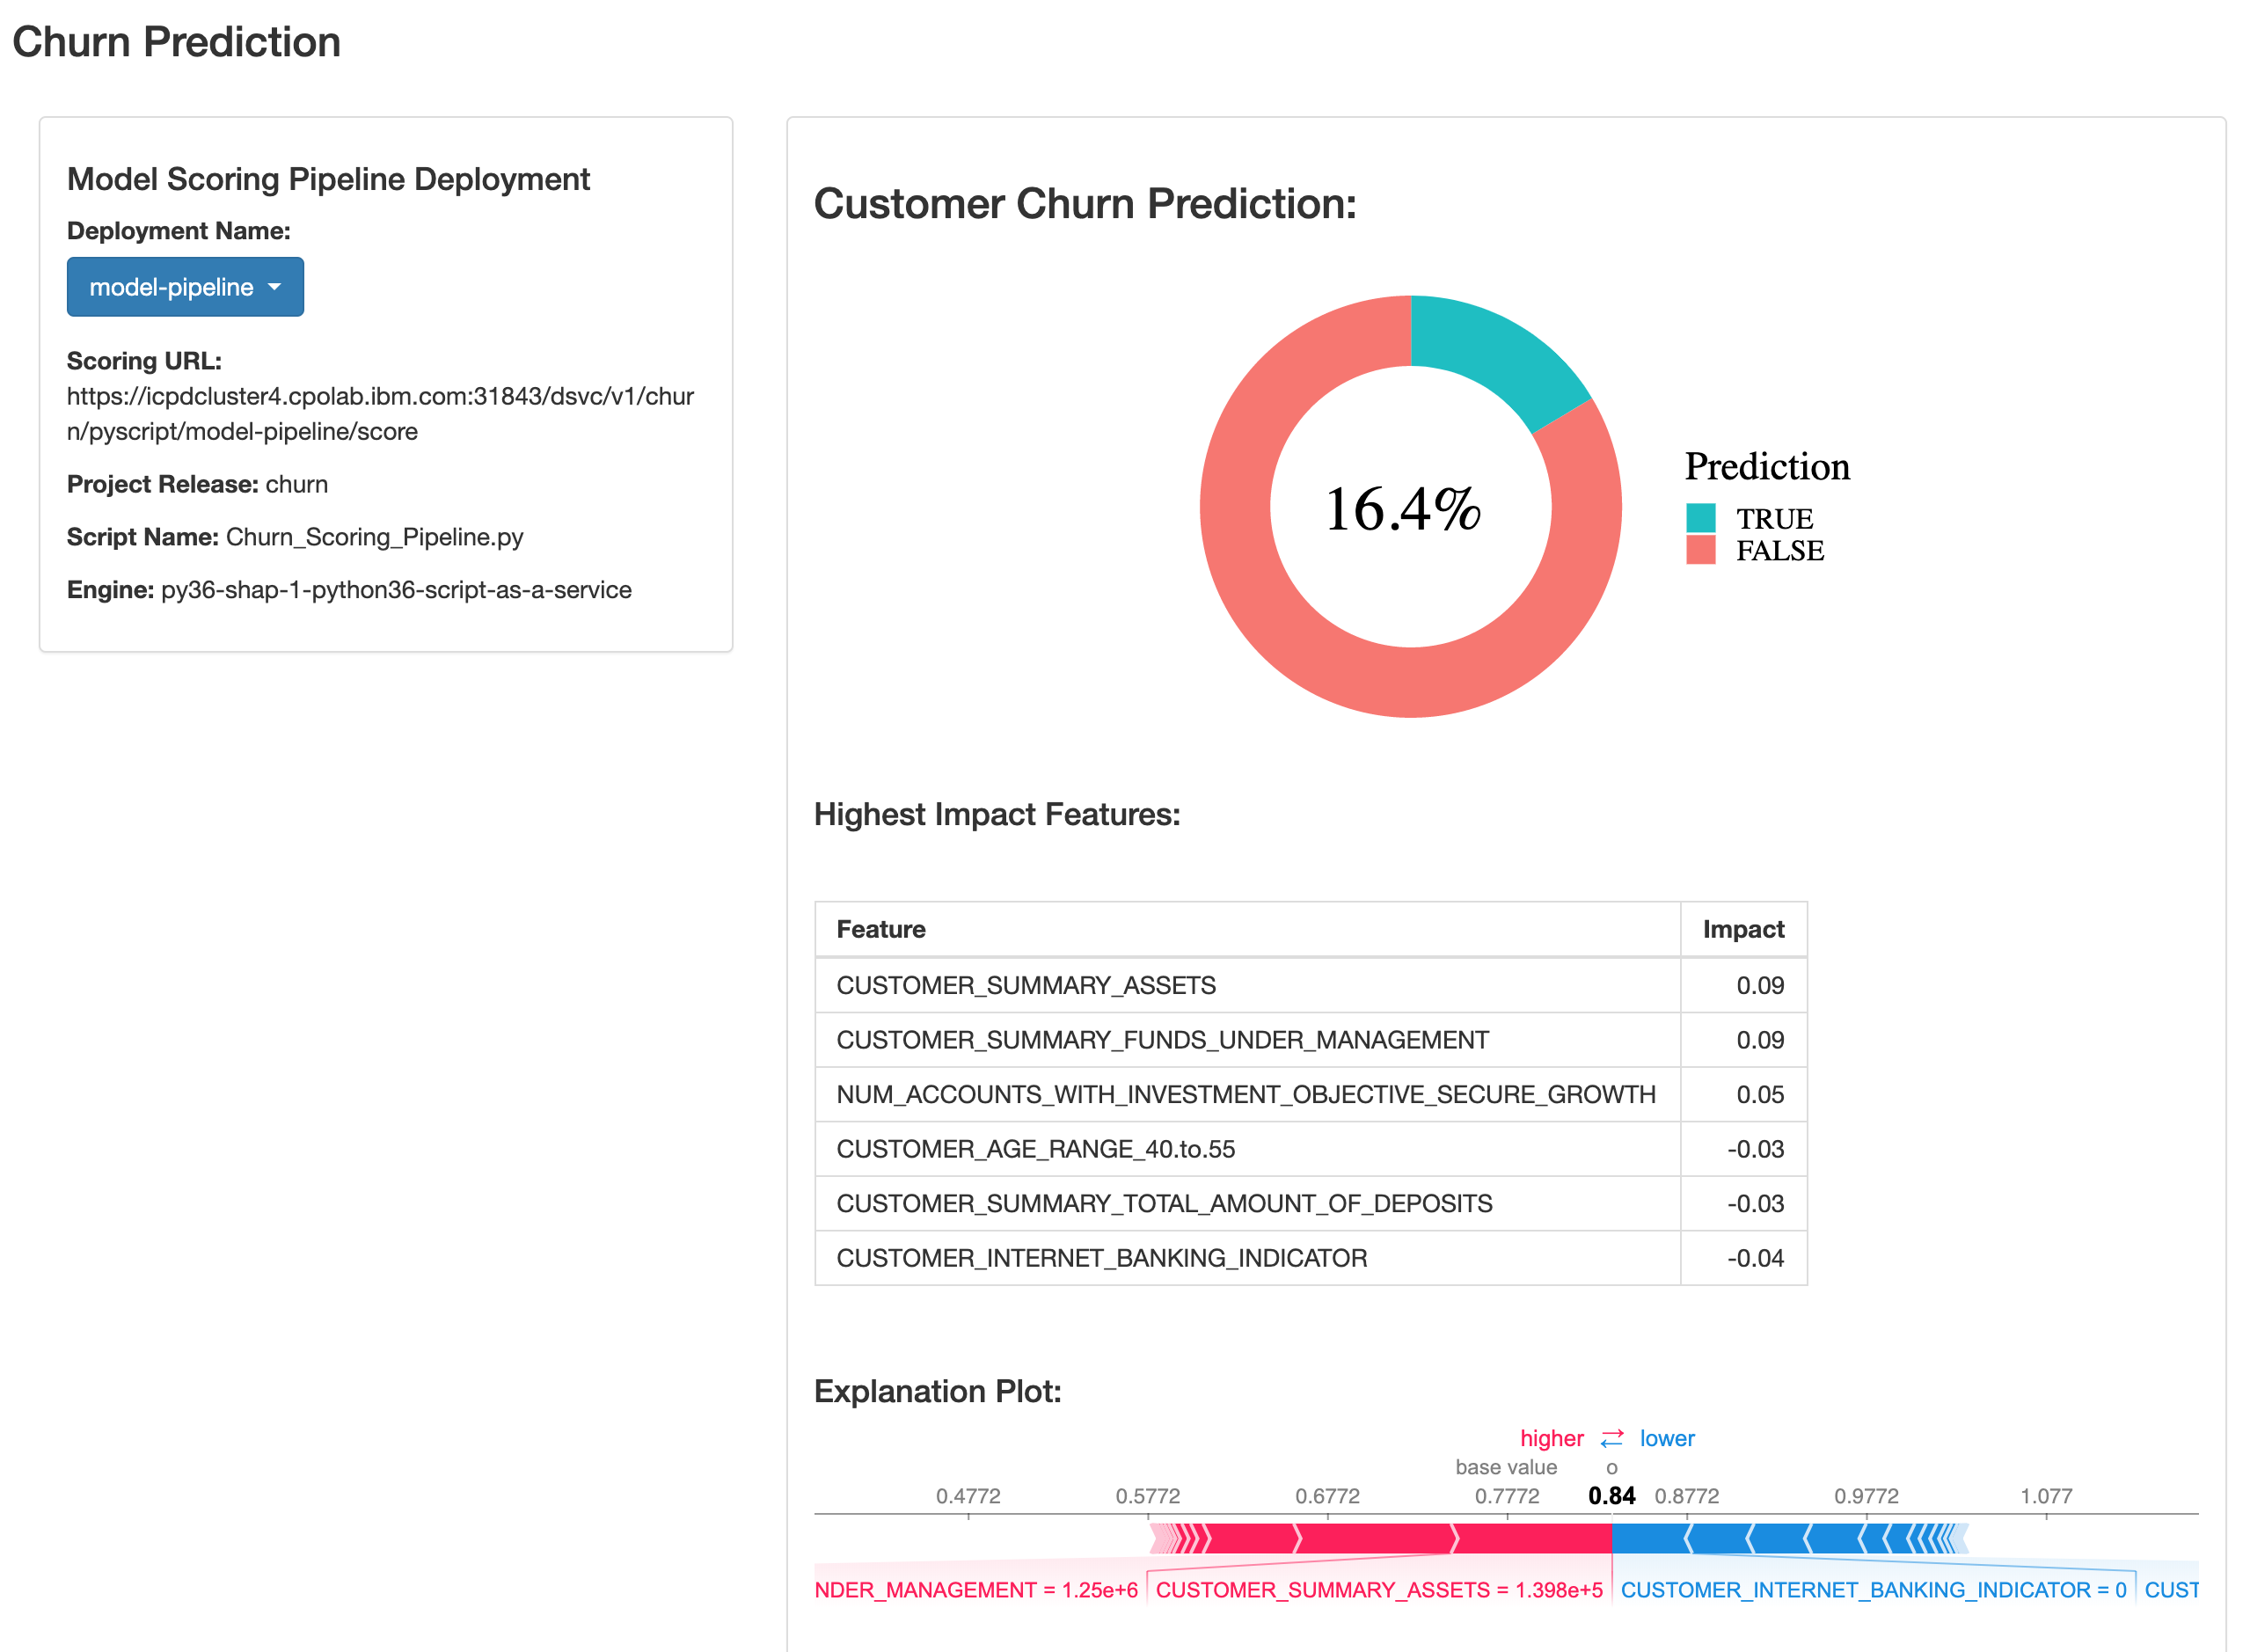

In [20]:
from IPython.display import Image
Image(filename='../misc/images/RShiny-15-Score.png') 